Code repo: https://github.com/luluppang/BCU

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

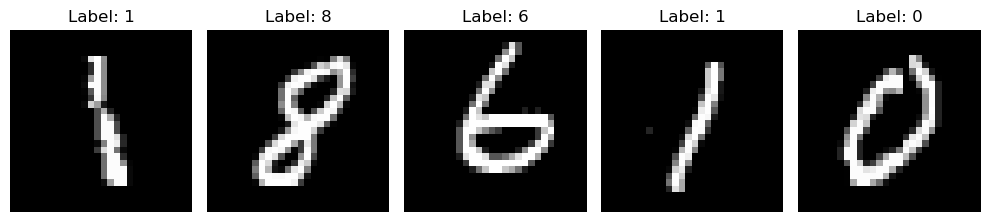

In [7]:
def show_images(dataset, num_images=5):
    # Set up a figure to plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))

    # Get random indices for selecting images
    indices = torch.randperm(len(dataset))[:num_images]

    # Loop through the selected indices and plot the corresponding images
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        axes[i].imshow(image.squeeze().numpy(), cmap='gray')
        axes[i].set_title('Label: {}'.format(label))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Usage example:
show_images(trainset, num_images=5)